In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [36]:
import sympy as sp
sp.init_printing()

## Calculating Compound Interest

B = balance  
P = principal  
r = APR  
n = number of compoundings per year  
t = number of years  
c = contribution per compounding interval  

\begin{equation}
B = P\left(1 + \frac{r}{n}\right)^{nt} + c\frac{\left[(1 + \frac{r}{n})^{(nt + 1)} - (1 + \frac{r}{n})\right]}{(\frac{r}{n})}
\end{equation}

In [2]:
P = 20000
APR = .02
m = 12
r = APR/m
c = 1500

def balance(principal, contribution, rate, noPeriods):
    return principal*(1+rate)**noPeriods + contribution*((1+rate)**(noPeriods + 1) - (1+rate))/rate

In [9]:
balance(P, c, r, 60)

116830.23079815248

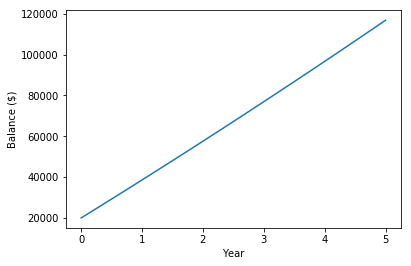

In [8]:
noYears = 5
x = np.linspace(0,noYears)
plt.plot(x,balance(P, c, r, x*12))
plt.xlabel("Year")
plt.ylabel("Balance ($)")
plt.show()

In [5]:
class account:
    _registry = []
    
    @classmethod
    def listAccounts(cls):
        for acct in cls._registry:
            print(acct.name)
            
    @classmethod
    def plotAccounts(cls, noYears):
        t = np.linspace(0, noYears)
        for acct in cls._registry:
            plt.plot(t, acct.balance)
            
    numberOfAccounts = 0
    
    acctTypes = ('savings','investment')
    
    def __init__(self, name, accountType, principal, APR, APRvar, compPerYear, contribution, contPerYear):
        
        self.name = name
        self.accountType = accountType
        self.principal = principal
        self.APR = APR
        self.APRvar = APRvar
        self.compPerYear = compPerYear #number of compounding periods per year
        self.contribution = contribution
        self.contPerYear = contPerYear #number of contributions per year
        
        if accountType not in self.acctTypes:
            raise ValueError("%s is not a valid account type." % accountType)
        
        if (principal < 0):
            raise ValueError("Principal must be a positive number")
        
        self._registry.append(self)
        type(self).numberOfAccounts += 1
    
    def __del__(self):
        self._registry.insert(0,self)
        type(self).numberOfAccounts -= 1
        
    def calcBalance(self,noYears):
        P = self.principal
        r = self.APR/100
        n = self.compPerYear
        t = noYears
        c = self.contribution*self.contPerYear/self.compPerYear
        
        balance = P*(1 + r/n)**(n*t) + c*((1 + r/n)**(n*t + 1) - (1 + r/n))/(r/n)
        
        return balance
    
    

In [13]:
test = account("test","checking", 0, 0, 0, 500, 'weekly')

ValueError: checking is not a valid account type.

In [23]:
test = account("test","savings", -10, 0, 0, 100, 'weekly')

ValueError: Principal must be a positive number

In [6]:
CapOne = account("CapOne", "savings", 20000, 2, 0, 12, 1500, 12)
Betterment = account("Betterment", "investment", 10000, 4, 3, 12, 500, 26)
account.numberOfAccounts

2

In [8]:
del Betterment

In [33]:
account.numberOfAccounts

2

In [41]:
for a in account._registry:
    print(a.name)

CapOne
Betterment


In [42]:
account.listAccounts()

CapOne
Betterment


In [59]:
CapOne.APR

In [7]:
CapOne.calcBalance(5)

116830.23079815248